In [1]:
import poppy
import jax
import functools

In [2]:
f = poppy.field(7,2)
a = poppy.random((2,2,2),f)

print(f'a.lift()\n{a.lift()}\n')
print(f'a.proj()\n{a.proj()}\n')
print(f'a.transpose().proj()\n{a.transpose().proj()}\n')
print(f'a.inv().proj()\n{a.inv().proj()}\n') 
print(f'(a@a.inv()).proj()\n{(a@a.inv()).proj()}\n')
print(f'a.trace().proj()\n{a.trace().proj()}\n')
print(f'a.det().proj()\n{a.det().proj()}\n')
print(f'a.rank()\n{a.rank()}\n')
print(f'a.ker().proj()\n{a.ker().proj()}\n')
print(f'a.im().proj()\n{a.im().proj()}\n')
print(f'a.mod(a).proj()\n{a.mod(a).proj()}\n')

a.lift()
[[[[[1 5]
    [6 6]]

   [[4 3]
    [5 0]]]


  [[[6 4]
    [2 3]]

   [[6 0]
    [0 6]]]]



 [[[[5 1]
    [4 6]]

   [[5 0]
    [0 5]]]


  [[[0 5]
    [6 5]]

   [[1 1]
    [4 2]]]]]

a.proj()
[[[36 25]
  [34  6]]

 [[12  5]
  [35  8]]]

a.transpose().proj()
[[[36 34]
  [25  6]]

 [[12 35]
  [ 5  8]]]

a.inv().proj()
[[[16 46]
  [ 2 42]]

 [[21 33]
  [16 31]]]

(a@a.inv()).proj()
[[[1 0]
  [0 1]]

 [[1 0]
  [0 1]]]

a.trace().proj()
[[[35 20]]]

a.det().proj()
[[[39 23]]]

a.rank()
[2 2]

a.ker().proj()
[[[0 0]
  [0 0]]

 [[0 0]
  [0 0]]]

a.im().proj()
[[[36 25]
  [34  6]]

 [[12  5]
  [35  8]]]

a.mod(a).proj()
[[[0 0]
  [0 0]]

 [[0 0]
  [0 0]]]



In [3]:
f = poppy.field(7,2)
a = poppy.random((1,32,32),f)
l,u,d,perm = a.lu()
print((poppy.block((l[0]@u[0]%f.p)[perm[0]],f)-a.lift()[0]).ravel())

[0 0 0 ... 0 0 0]


In [4]:
p = 2
n = 3
f = poppy.field(p,n)

print(f'GL2(F{p**n}) has order {len(poppy.gl2(f)[0])}')
print(f'PGL2(F{p**n}) has order {len(poppy.pgl2(f)[0])}')
print(f'SL2(F{p**n}) has order {len(poppy.sl2(f)[0])}')
print(f'PSL2(F{p**n}) has order {len(poppy.psl2(f)[0])}')

GL2(F8) has order 3528
PGL2(F8) has order 504
SL2(F8) has order 504
PSL2(F8) has order 504


In [5]:
p = 11

psl2c, i = poppy.psl2mod(p)

print(psl2c)
print(i)

[  232   233   234   235   236   297   298   299   300   301   302   441
   442   443   444   445   573   574   575   576   577   627   628   629
   630   631   632   826   827   828   829   830   880   881   882   883
   884   885  1012  1013  1014  1015  1016  1017  1156  1157  1158  1159
  1160  1221  1222  1223  1224  1225  1226  1332  1343  1354  1365  1376
  1387  1398  1409  1420  1431  1442  1453  1465  1477  1489  1501  1574
  1587  1600  1628  1641  1654  1695  1709  1740  1754  1785  1816  1831
  1850  1884  1918  1937  1958  1974  1995  2016  2037  2058  2081  2104
  2127  2150  2179  2204  2211  2236  2268  2293  2300  2335  2343  2370
  2378  2413  2421  2468  2477  2524  2533  2542  2552  2623  2633  2643
  2653  2795  2818  2841  2864  2887  2959  2971  2983  2995  3007  3019
  3038  3063  3070  3095  3127  3180  3193  3206  3247  3260  3281  3289
  3316  3324  3359  3367  3411  3425  3456  3470  3501  3524  3533  3542
  3580  3589  3598  3655  3674  3689  3708  3723  3

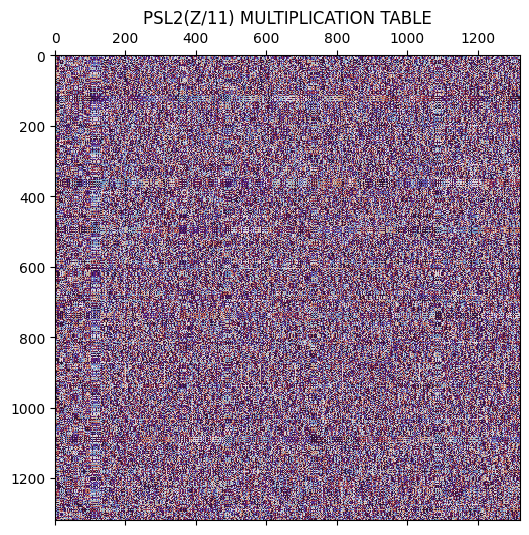

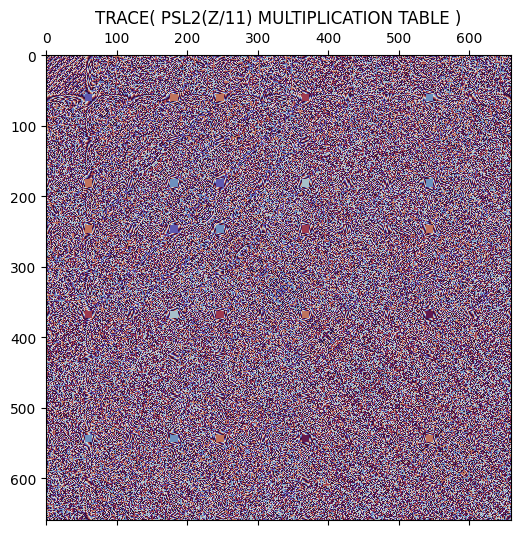

In [6]:
psl2 = jax.vmap(poppy.decode, in_axes = (0,None))(psl2c,p).squeeze()

poppy.plot(jax.numpy.tensordot(psl2,psl2, axes=([2],[1])).reshape((len(psl2)*2,-1))%p, title = f'PSL2(Z/{p}) MULTIPLICATION TABLE')
poppy.plot(poppy.tracemod(jax.numpy.tensordot(psl2,psl2, axes=([2],[1])).swapaxes(1,2)%p,p), title = f'TRACE( PSL2(Z/{p}) MULTIPLICATION TABLE )')

In [7]:
p = 11

pgl2c, i = poppy.pgl2mod(p)

print(pgl2c)
print(i)

[  132   133   144 ... 14609 14620 14631]
[14641 14641 14641 ... 14641 14641 14641]


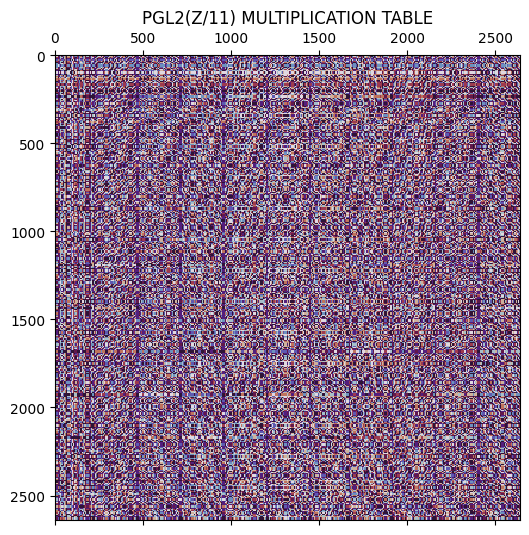

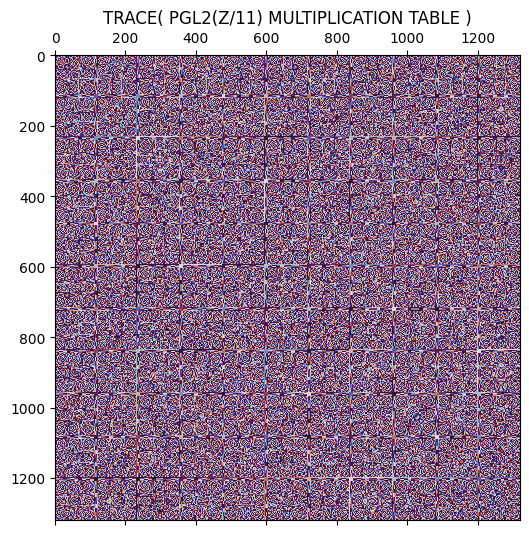

In [8]:
pgl2 = jax.vmap(poppy.decode, in_axes = (0,None))(pgl2c,p).squeeze()

poppy.plot(jax.numpy.tensordot(pgl2,pgl2, axes=([2],[1])).reshape((len(pgl2)*2,-1))%p, title = f'PGL2(Z/{p}) MULTIPLICATION TABLE')
poppy.plot(poppy.tracemod(jax.numpy.tensordot(pgl2,pgl2, axes=([2],[1])).swapaxes(1,2)%p,p), title = f'TRACE( PGL2(Z/{p}) MULTIPLICATION TABLE )')

In [9]:
p = 23
q = 17

lps, i = poppy.lps(p,q)

print(lps)
print(i)

[[65111 65383 60249 ... 61779 67831 67559]
 [32777 28901 81856 ... 41226 36466  8994]
 [28051 71146 13567 ... 75804 10524 38217]
 ...
 [82332  4200 72336 ... 50355 30278 81193]
 [41209  4557 36381 ... 54588 36976 58328]
 [55438  2279 79884 ... 79510 28493 50576]]
[83521 83521 83521 ... 83521 83521 83521]
